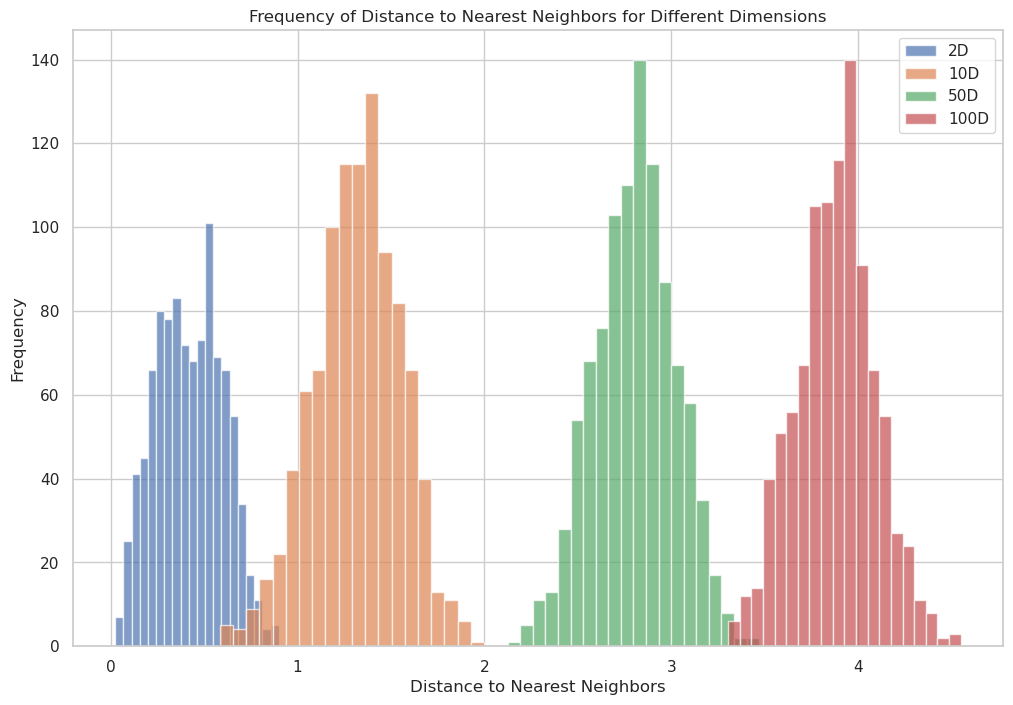

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def generate_data(num_points, num_dimensions):
    return np.random.rand(num_points, num_dimensions)

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
    num_points = 10000

dimensions_to_plot = [2, 10, 50, 100]

k = 5

plt.figure(figsize=(12, 8))

for num_dimensions in dimensions_to_plot:
    data = generate_data(num_points, num_dimensions)
    query_point = generate_data(1, num_dimensions)  # Generate a single query point

    distances_to_query = [euclidean_distance(query_point, point) for point in data]

    plt.hist(distances_to_query, bins=20, label=f'{num_dimensions}D',alpha=0.7)

plt.xlabel('Distance to Nearest Neighbors')
plt.ylabel('Frequency')
plt.title('Frequency of Distance to Nearest Neighbors for Different Dimensions')
plt.legend()
plt.grid(True)
plt.show()

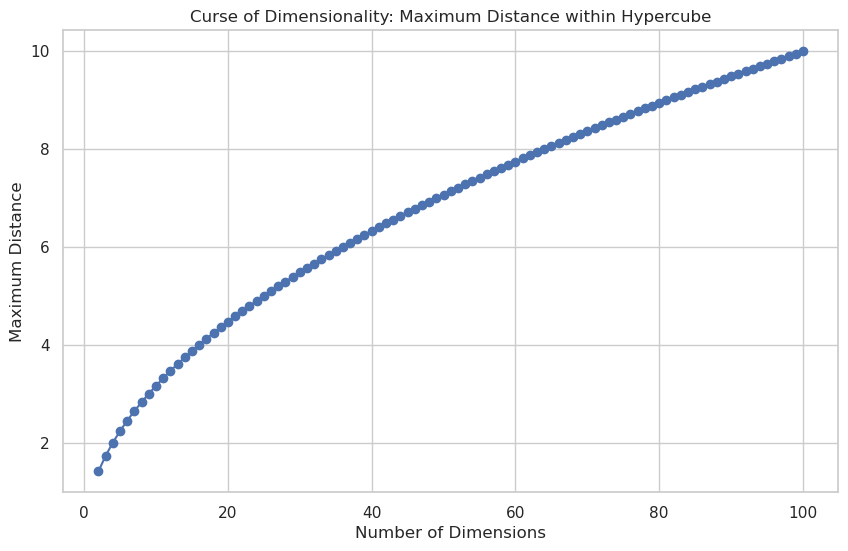

In [6]:
# Function to calculate maximum Euclidean distance within a hypercube
def max_distance_in_hypercube(num_dimensions):
    corner1 = np.zeros(num_dimensions)
    corner2 = np.ones(num_dimensions)
    return np.linalg.norm(corner2 - corner1)

num_points = 100

min_dimensions = 2
max_dimensions = 100

dimensions = range(min_dimensions, max_dimensions + 1)
max_distances = []

for num_dimensions in dimensions:
    max_distances.append(max_distance_in_hypercube(num_dimensions))

plt.figure(figsize=(10, 6))
plt.plot(dimensions, max_distances, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Maximum Distance')
plt.title('Curse of Dimensionality: Maximum Distance within Hypercube')
plt.grid(True)
plt.show()

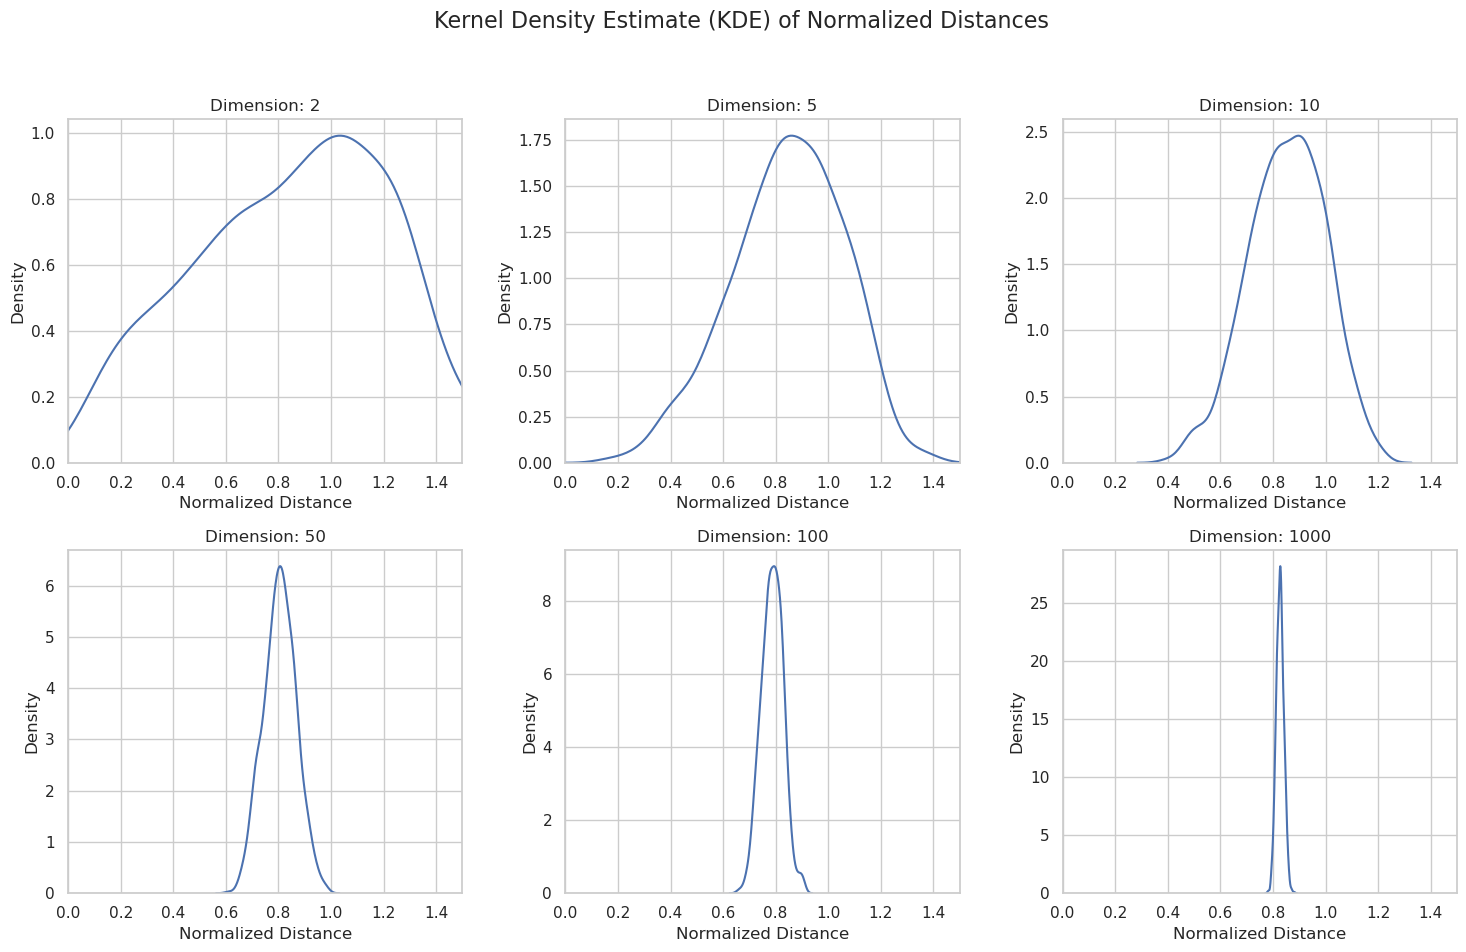

In [7]:
def normalized_distance(point1, point2):
    dimension = len(point1)
    normalization_factor = np.sqrt(dimension) / 2
    return np.sqrt(np.sum((point1 - point2) ** 2)) / normalization_factor

num_points = 1000

dimensions_to_plot = [2, 5, 10, 50, 100, 1000]

sns.set(style="whitegrid")

num_plots = len(dimensions_to_plot)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Kernel Density Estimate (KDE) of Normalized Distances', fontsize=16)

# Generate and plot data for each dimension
for i, num_dimensions in enumerate(dimensions_to_plot):
    row = i // num_cols
    col = i % num_cols

    data = generate_data(num_points, num_dimensions)
    query_point = generate_data(1, num_dimensions)[0]

    normalized_distances_to_query = [normalized_distance(query_point, point) for point in data]
    axes[row,col].set_xlim(0,1.5)
    sns.kdeplot(normalized_distances_to_query, ax=axes[row, col])
    axes[row, col].set_title(f'Dimension: {num_dimensions}')
    axes[row, col].set_xlabel('Normalized Distance')
    axes[row, col].set_ylabel('Density')
    axes[row, col].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
